# Analyzing Fandango movie ratings

Our goal is to determine if there's any difference between Fandango's ratings for  movies in 2015 versus Fandango's ratings for movies in 2016.

In [1]:
import pandas as pd
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [3]:
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


We will consider movies that are popular, meaning that have at least 30 fan ratings.

In [4]:
fandango_previous.sort_values('Fandango_votes').head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
39,Maps to the Stars (2015),3.5,3.1,35,0.4
122,Tangerine (2015),4.0,3.9,36,0.1
43,The Diary of a Teenage Girl (2015),4.0,3.6,38,0.4


We now separate movies of 2015 and movies of 2016

In [5]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]

In [6]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [7]:
fp2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fp2016 = fandango_previous[fandango_previous['Year'] == '2016'].copy()

fa2015 = fandango_after[fandango_after['year'] == 2015].copy()
fa2016 = fandango_after[fandango_after['year'] == 2016].copy()

We want to compare fp2015 (fandango previous 2015) with fa2016 (fandango after 2016)

### Comparing distribution shapes of 2015 with 2016

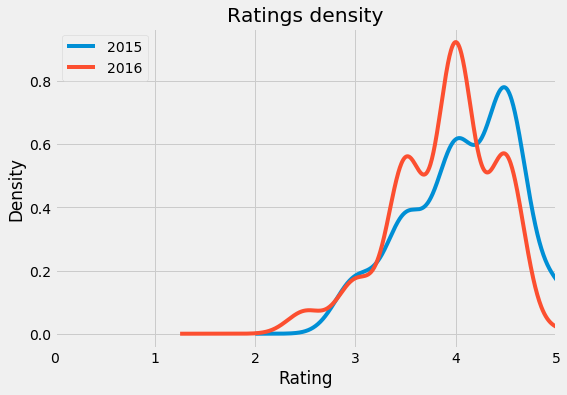

In [8]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')
fp2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fa2016['fandango'].plot.kde(label = '2016', legend = True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title("Ratings density")
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.show()

We see that both curves are strongly left skewed. Ratings indeed roughly decreased by 0.5 points from 2015 to 2016.

### Comparing frequencies

In [9]:
print('2015 : ', fp2015.shape, '\n' '2016 : ', fa2016.shape)

2015 :  (129, 6) 
2016 :  (191, 3)


We want to look at frequencies, but since fp2015 as 129 rows and fa2016 has 191 rows, it makes more sense to look at percentages instead of absolute frequencies.

In [10]:
print(2015, '\n', fp2015['Fandango_Stars'].value_counts(normalize = True).sort_index(), '\n', )
print(2016, '\n', fa2016['fandango'].value_counts(normalize = True).sort_index(), '\n', fa2016.shape)

2015 
 3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64 

2016 
 2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64 
 (191, 3)


The proportion of high ratings went down from 2015 to 2016. The proportion of low ratings went up from 2015 to 2016.

### The direction of the change

Let's look at some basic statistics

In [11]:
print('2015', '\n')
print('mean : ', fp2015['Fandango_Stars'].mean())
print('median : ', fp2015['Fandango_Stars'].median())
print('mode : ', fp2015['Fandango_Stars'].mode())
print(fp2015['Fandango_Stars'].describe())
print('\n')

print('2016', '\n')
print('mean : ', fa2016['fandango'].mean())
print('median : ', fa2016['fandango'].median())
print('mode : ', fa2016['fandango'].mode())
print(fa2016['fandango'].describe())

2015 

mean :  4.0852713178294575
median :  4.0
mode :  0    4.5
dtype: float64
count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64


2016 

mean :  3.887434554973822
median :  4.0
mode :  0    4.0
dtype: float64
count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64


Let's put the values in a table to plot a graph

In [12]:
import numpy as np
mean2015 = fp2015['Fandango_Stars'].mean()
mean2016 = fa2016['fandango'].mean()
median2015 = fp2015['Fandango_Stars'].median()
median2016 = fa2016['fandango'].median()
mode2015 = fp2015['Fandango_Stars'].mode()[0]
mode2016 = fa2016['fandango'].mode()[0]

df = pd.DataFrame(np.array([[mean2015, mean2016], [median2015, median2016], [mode2015, mode2016]]), columns = ['2015', '2016'])
df.index = ['mean', 'median', 'mode']
df

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


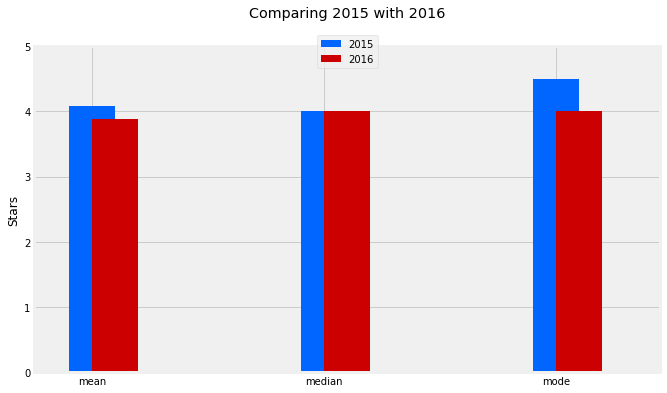

In [13]:
from numpy import arange
df['2015'].plot(kind = 'bar', color = '#0066FF', rot = 0, figsize = (10,6), align = 'center', width = .2)
df['2016'].plot(kind = 'bar', color = '#CC0000', rot = 0, figsize = (10,6), align = 'edge', width = .2)

plt.ylabel('Stars')
plt.title("Comparing 2015 with 2016", y = 1.07)
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.05))
plt.ylim(0,5)
plt.yticks = np.arange(0,5.5,0.5)
plt.show()